In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
import importlib
from collections import defaultdict

import result_processing.file_reader as reader

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
sns.set_theme(style="whitegrid",
              # palette='colorblind',
              rc={'text.usetex': True},
              # font_scale=1.5,
              )
# Setting usetex=True in sns does not work with the style,
# so we set it separately here
mpl.rc('font', **{'family': 'serif'})
mpl.rc('text', usetex=True)
plt.rcParams['figure.dpi'] = 300

In [62]:
root_dir = '/home/francelico/dev/PhD/procgen/results/results'
output_dir = '/home/francelico/dev/PhD/procgen/results/plots'

In [73]:
run_names = [name for name in os.listdir(root_dir)]
importlib.reload(reader)
log_readers = [reader.LogReader(run_name, root_dir, output_dir) for run_name in run_names]

Found log directory: /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-8888
Saving messages to /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-8888/out.log
Found log directory: /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-88
Saving messages to /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-88/out.log
Found log directory: /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-8
Saving messages to /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-8/out.log
Found log directory: /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-888
Saving messages to /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni_i_pred-4-SEED-888/out.log
Found log directory: /home/francelico/dev/PhD/procgen/results/results/bs_uni_i_pred-4/bs_uni

In [74]:
# sort log readers into a dict by env name and args['level_replay_strategy']
temp = defaultdict(lambda: defaultdict(list))
for log_reader in log_readers:
    temp[log_reader.env_name][log_reader.level_replay_strategy].append(log_reader)

log_readers = temp


# _tick         _time        step   pg_loss  value_loss  dist_entropy  \
0         0.0  1.691449e+09     16384.0 -0.000312    0.365083      2.707842   
1         1.0  1.691449e+09     32768.0 -0.000216    0.185643      2.707426   
2         2.0  1.691449e+09     49152.0 -0.000246    0.133437      2.706477   
3         3.0  1.691450e+09     65536.0 -0.000605    0.154965      2.704234   
4         4.0  1.691450e+09     81920.0 -0.002605    0.242888      2.696839   
...       ...           ...         ...       ...         ...           ...   
7620   1520.0  1.691951e+09  24920064.0 -0.004713    0.617695      2.350471   
7621   1521.0  1.691951e+09  24936448.0 -0.005536    0.380734      2.373061   
7622   1522.0  1.691951e+09  24952832.0 -0.002305    0.438487      2.452294   
7623   1523.0  1.691951e+09  24969216.0 -0.007952    1.018526      2.360229   
7624   1524.0  1.691952e+09  24985600.0 -0.010019    0.589476      2.416599   

      instance_pred_loss  instance_pred_entropy  instance_pred_accuracy  \
0               5.262589               5.297677                0.034831   
1               5.294784               5.295578                0.023112   
2               5.302146               5.290942                0.004374   
3               5.222014               5.277659                0.000000   
4               5.144275               5.251597                0.000000   
...                  ...                    ...                     ...   
7620            1.180388               0.666513                0.718486   
7621            0.767393               0.950949                0.797892   
7622            0.689582               0.974157                0.812195   
7623            2.151174               1.696428                0.532084   
7624            1.677339               1.203568                0.675435   

      instance_pred_precision  train:mean_episode_return  \
0                    0.005184                        0.5   
1                    0.005030                        0.6   
2                    0.005009                        0.6   
3                    0.005443                        1.6   
4                    0.005976                        2.0   
...                       ...                        ...   
7620                 0.662637                       10.6   
7621                 0.648729                       11.4   
7622                 0.684675                       16.7   
7623                 0.414299                        6.3   
7624                 0.556166                       14.6   

      train:median_episode_return  test:mean_episode_return  \
0                             0.0                       0.7   
1                             0.0                       1.0   
2                             0.0                       0.5   
3                             1.5                       1.4   
4                             3.0                       0.3   
...                           ...                       ...   
7620                          7.5                      13.4   
7621                          4.0                      12.1   
7622                          2.0                       9.7   
7623                          1.0                      11.8   
7624                         13.0                       8.4   

      test:median_episode_return  train_eval:mean_episode_return  \
0                            0.0                             1.1   
1                            0.5                             1.6   
2                            0.0                             0.3   
3                            1.0                             0.5   
4                            0.0                             0.4   
...                          ...                             ...   
7620                         7.0                             9.5   
7621                         7.5                            15.4   
7622                         1.5                            13.1  

In [54]:
# labels_to_smooth = ['train_eval:mean_episode_return', 'test:mean_episode_return', 'train:mean_episode_return', 'instance_pred_accuracy', 'instance_pred_precision', 'instance_pred_entropy']
# for env_name, rr in log_readers.items():
#     for level_replay_strategy, run_readers in rr.items():
#         for run_reader in run_readers:
#             for label in labels_to_smooth:
#                 run_reader.logs[f'{label}_mavg'] = run_reader.logs[label].rolling(10).mean()

# Train/test/eval scores with and without smoothing

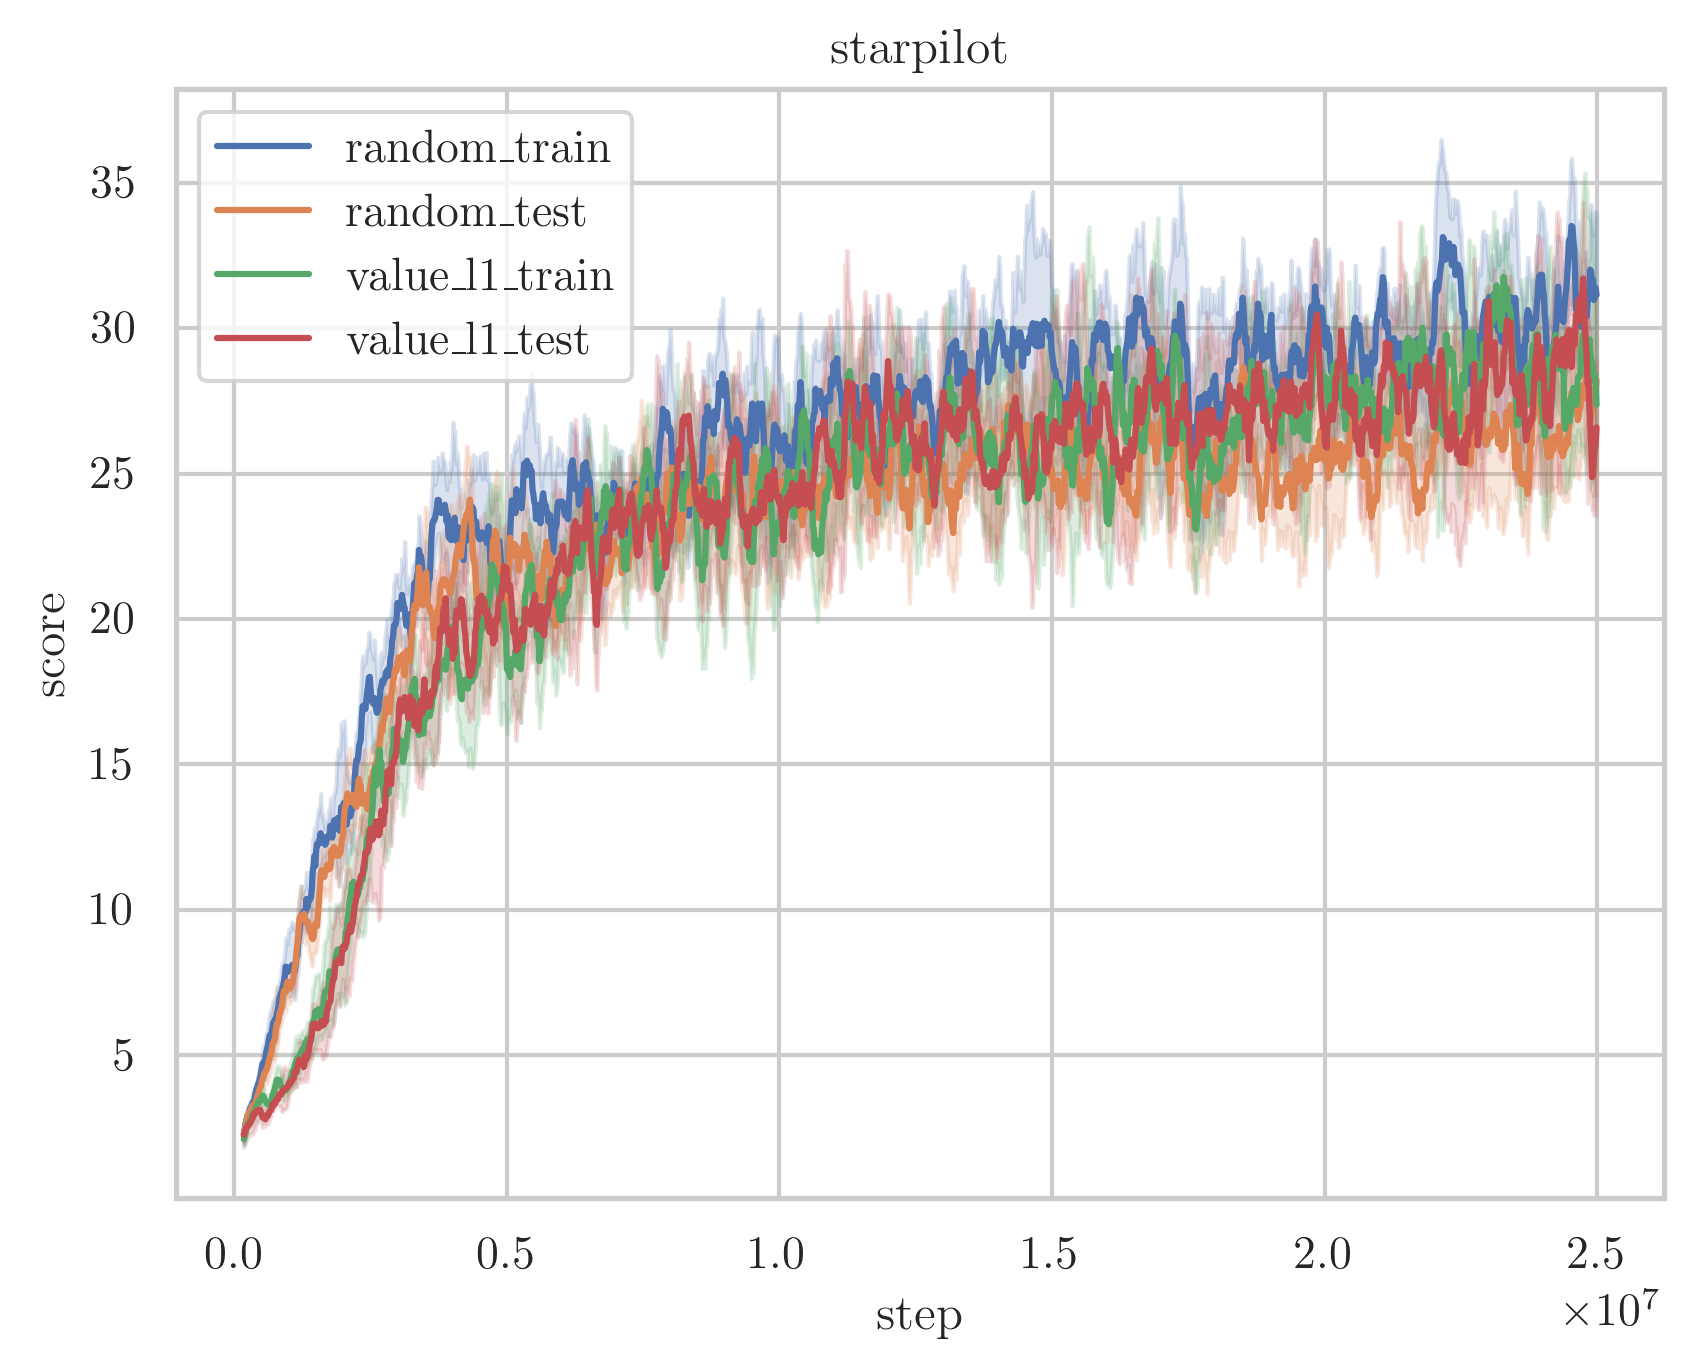

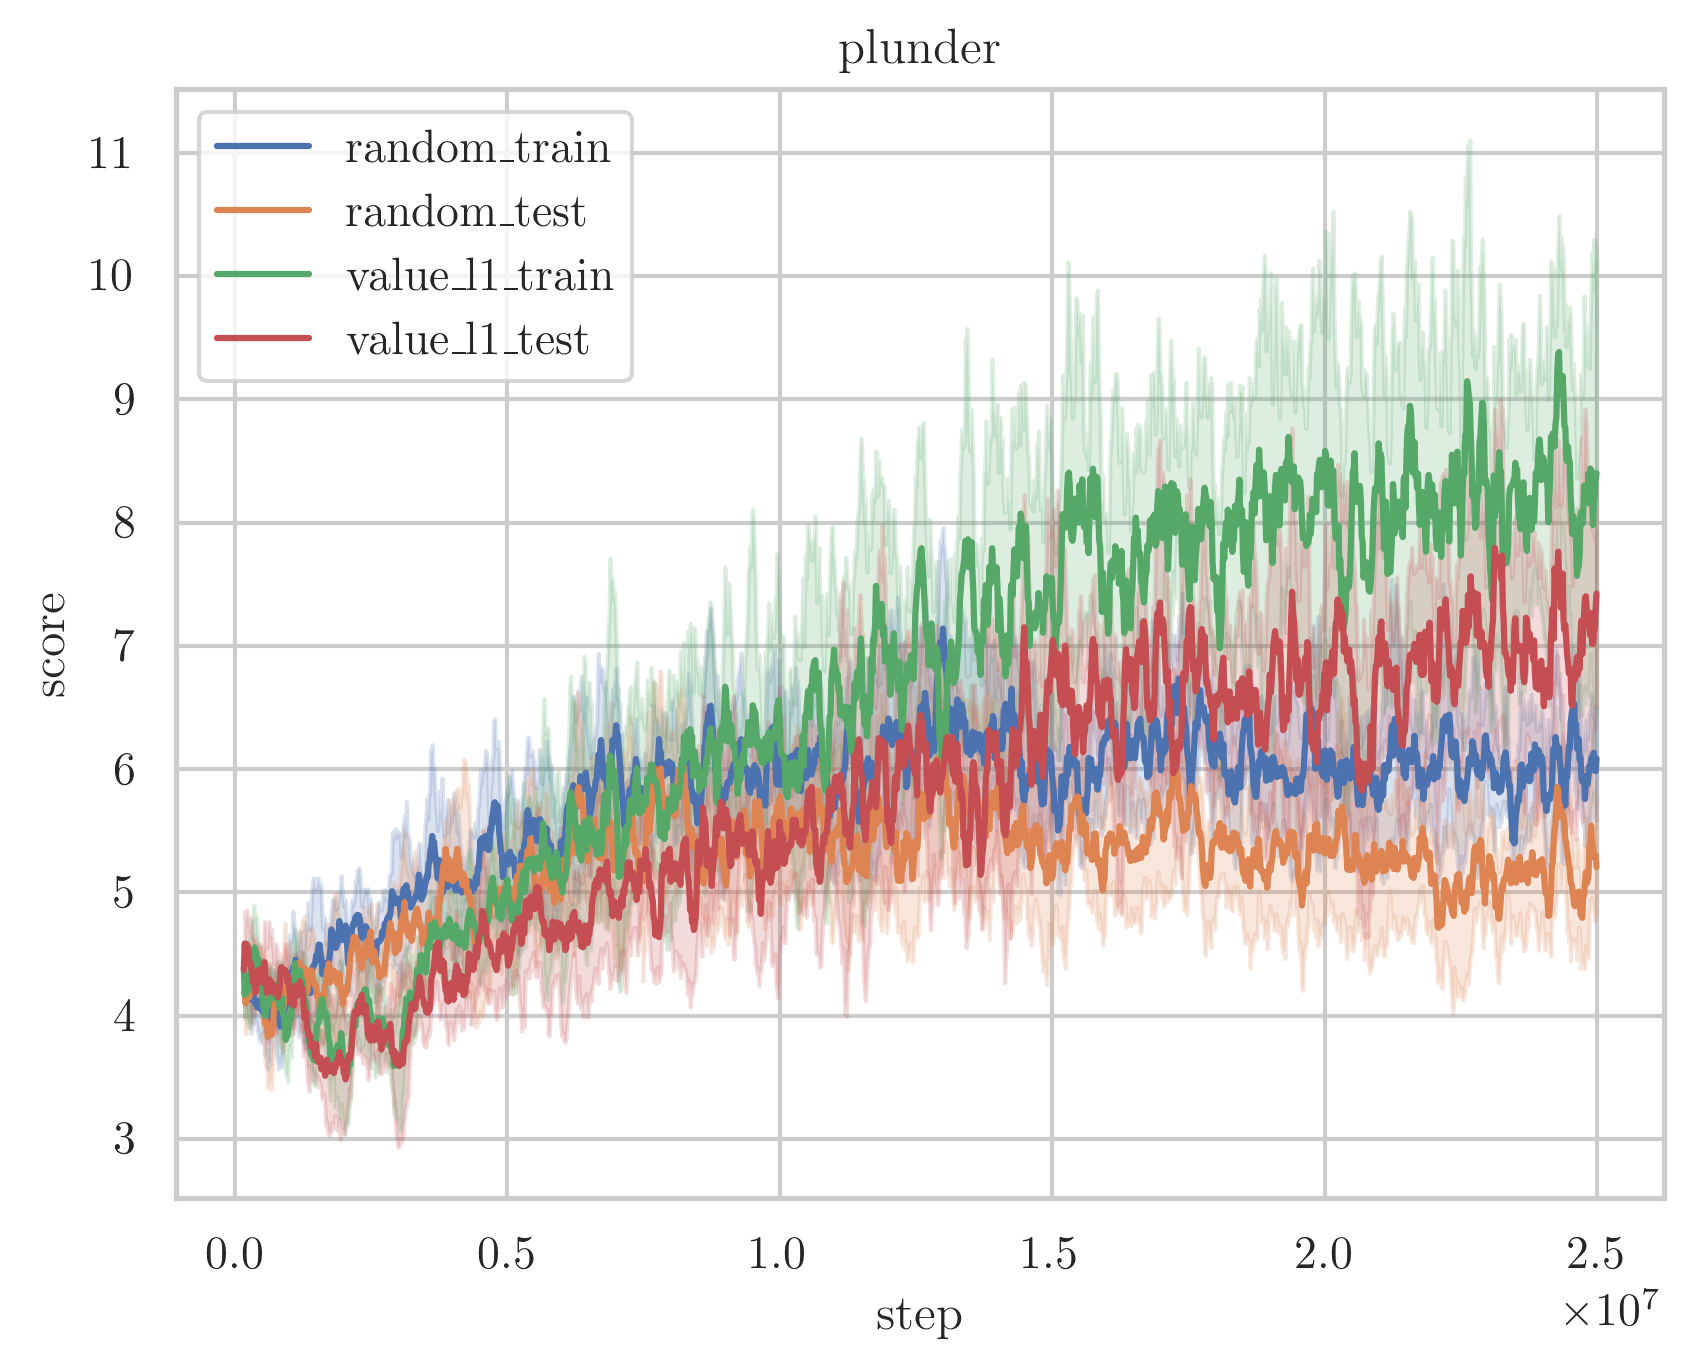

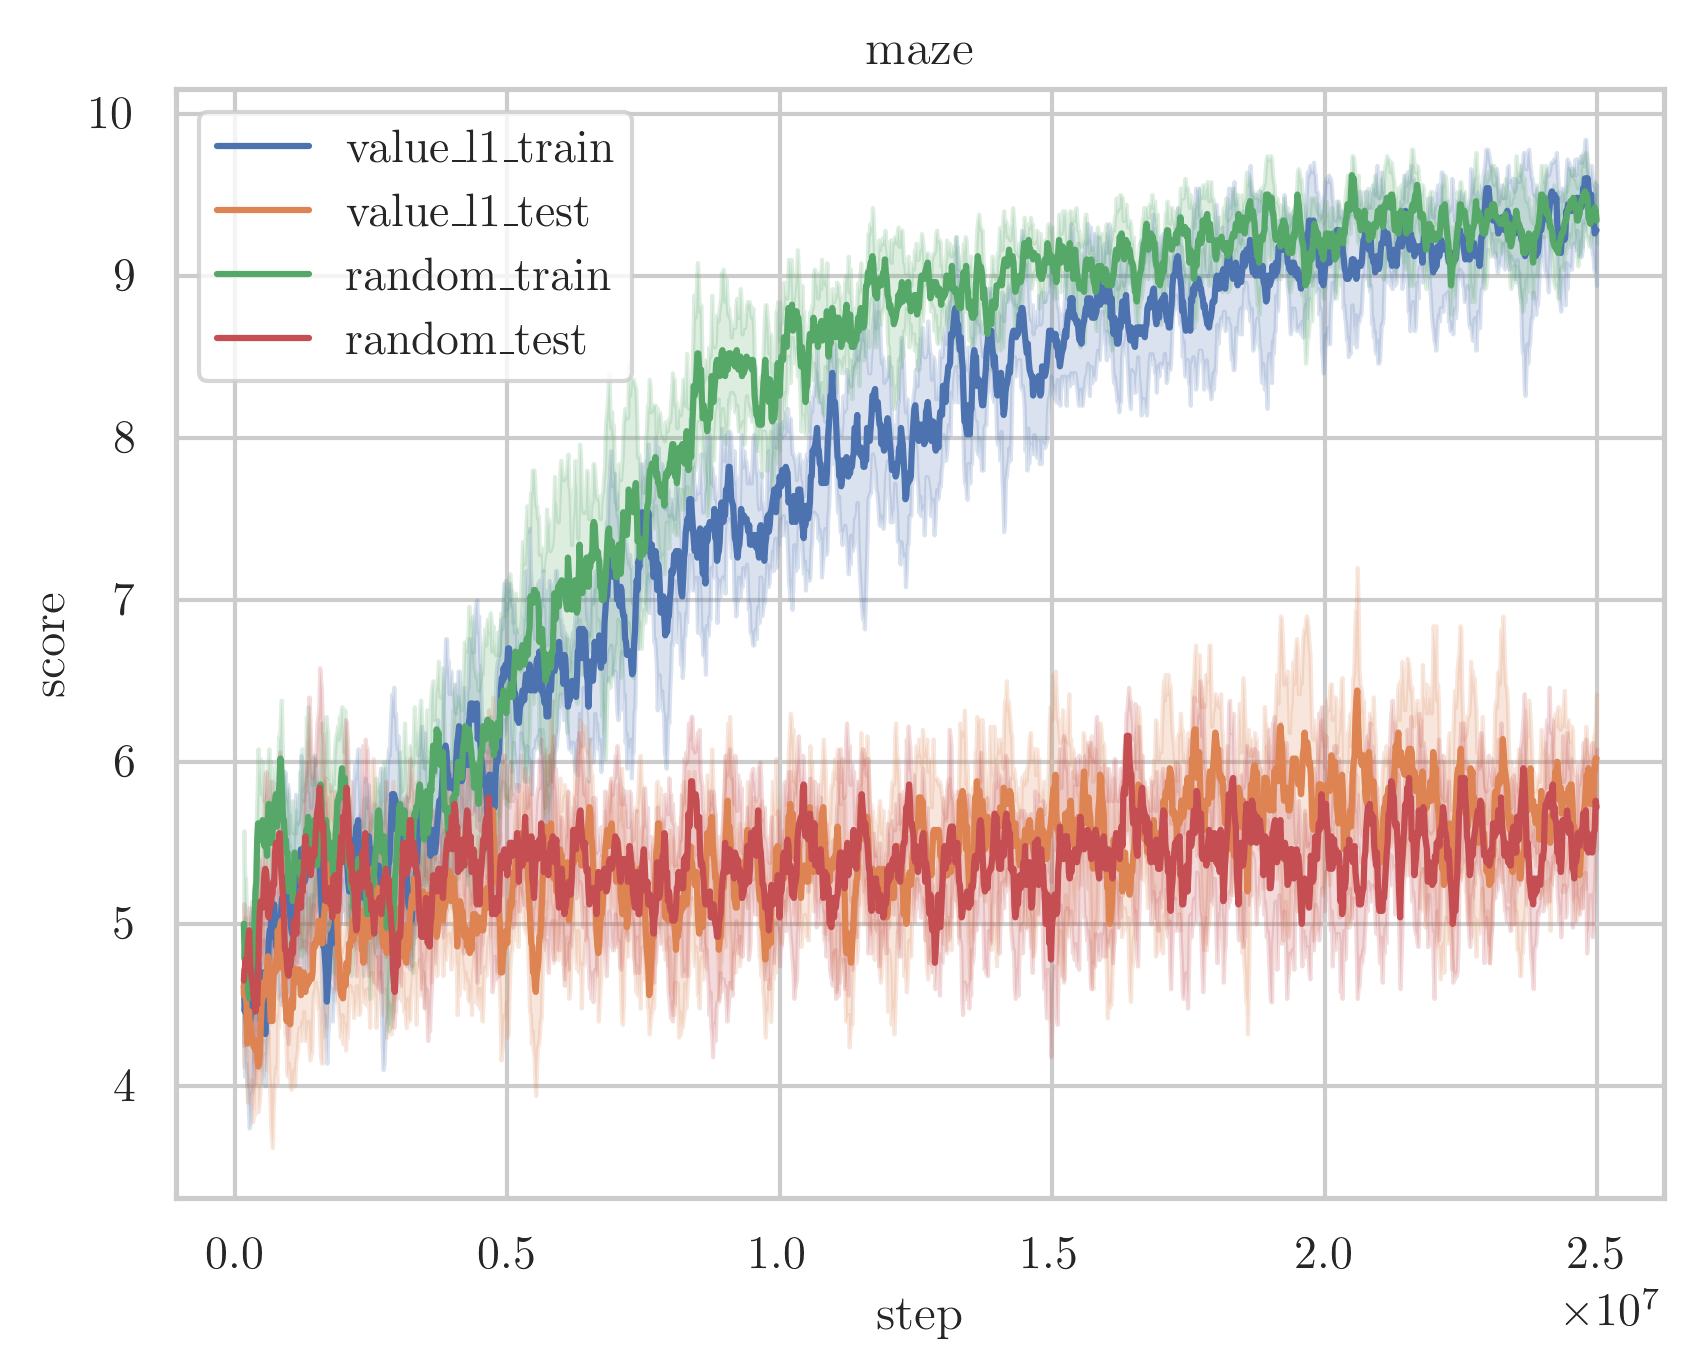

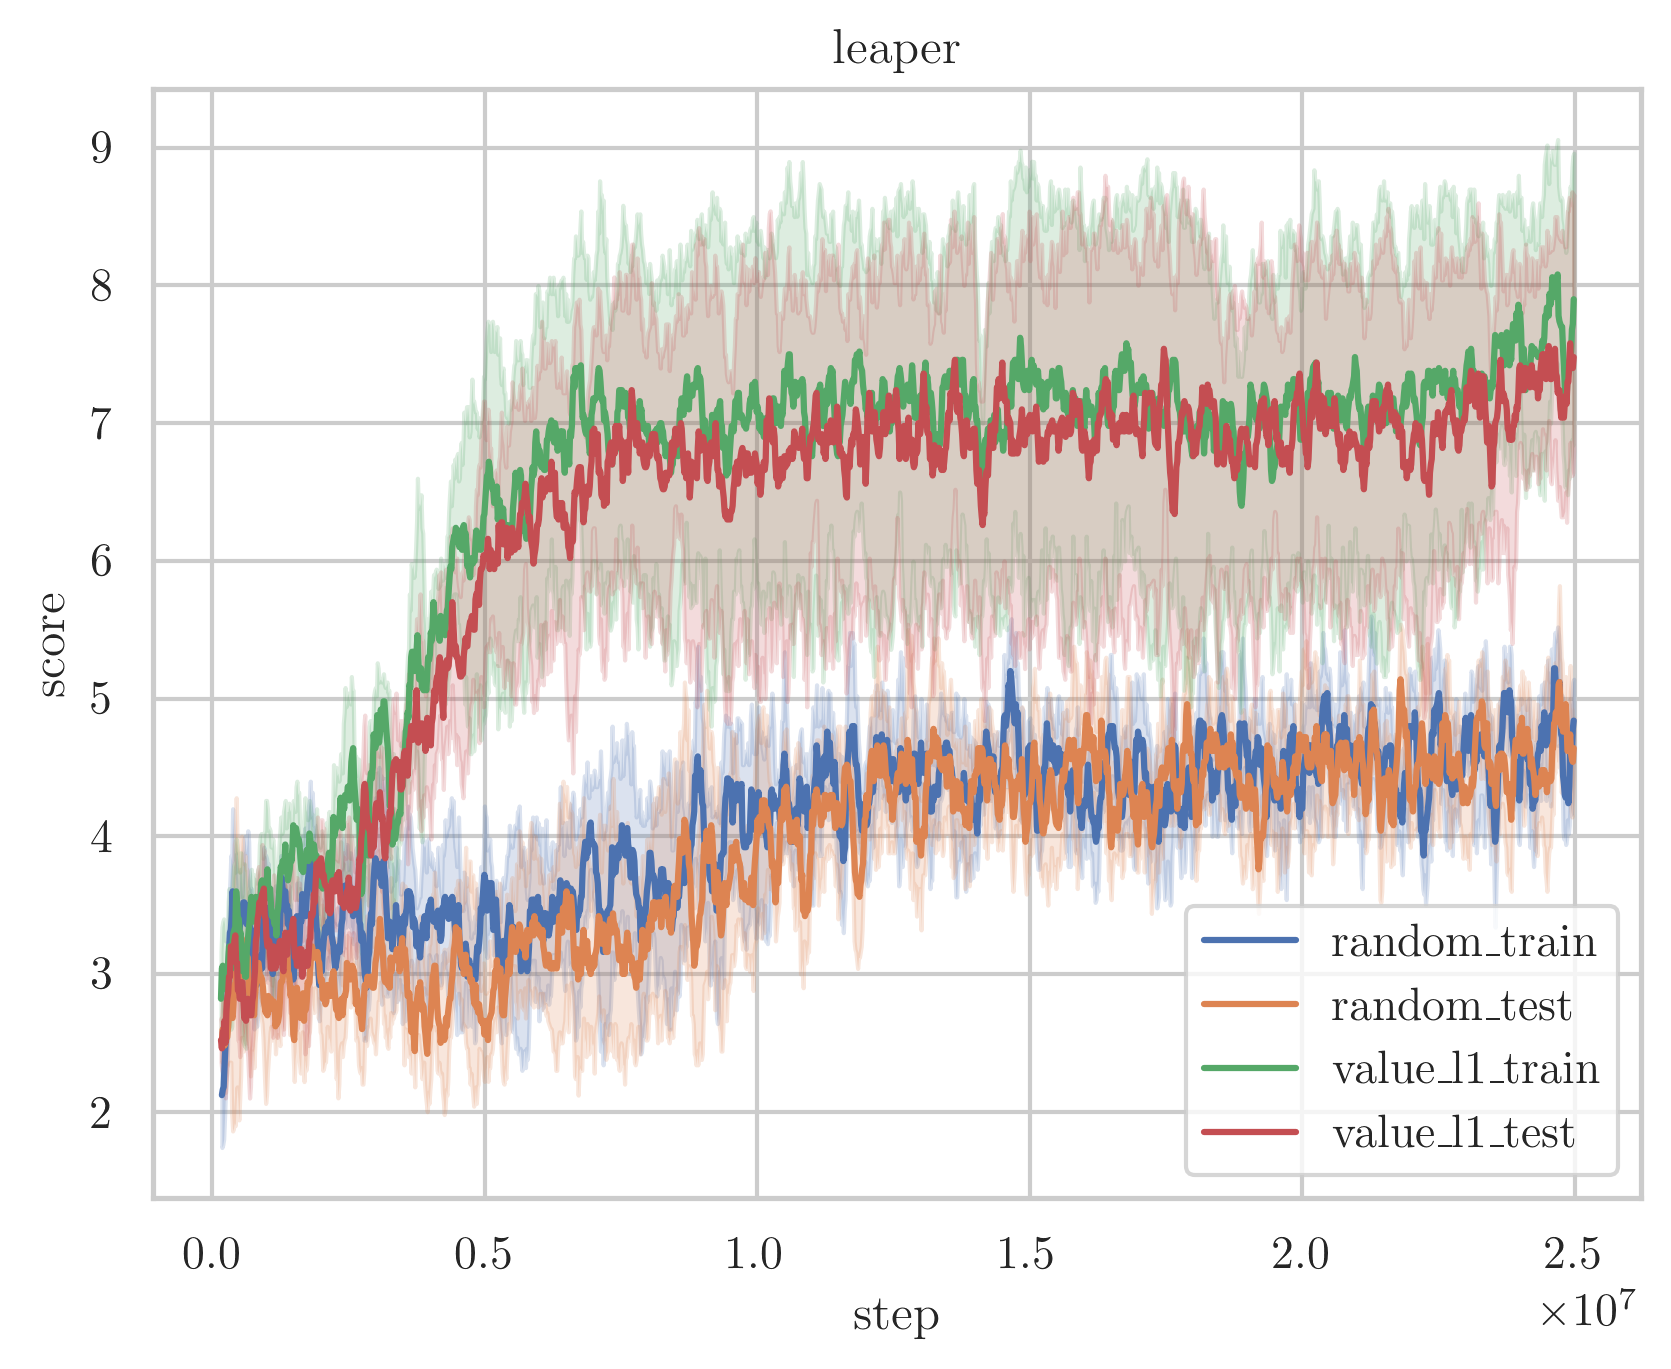

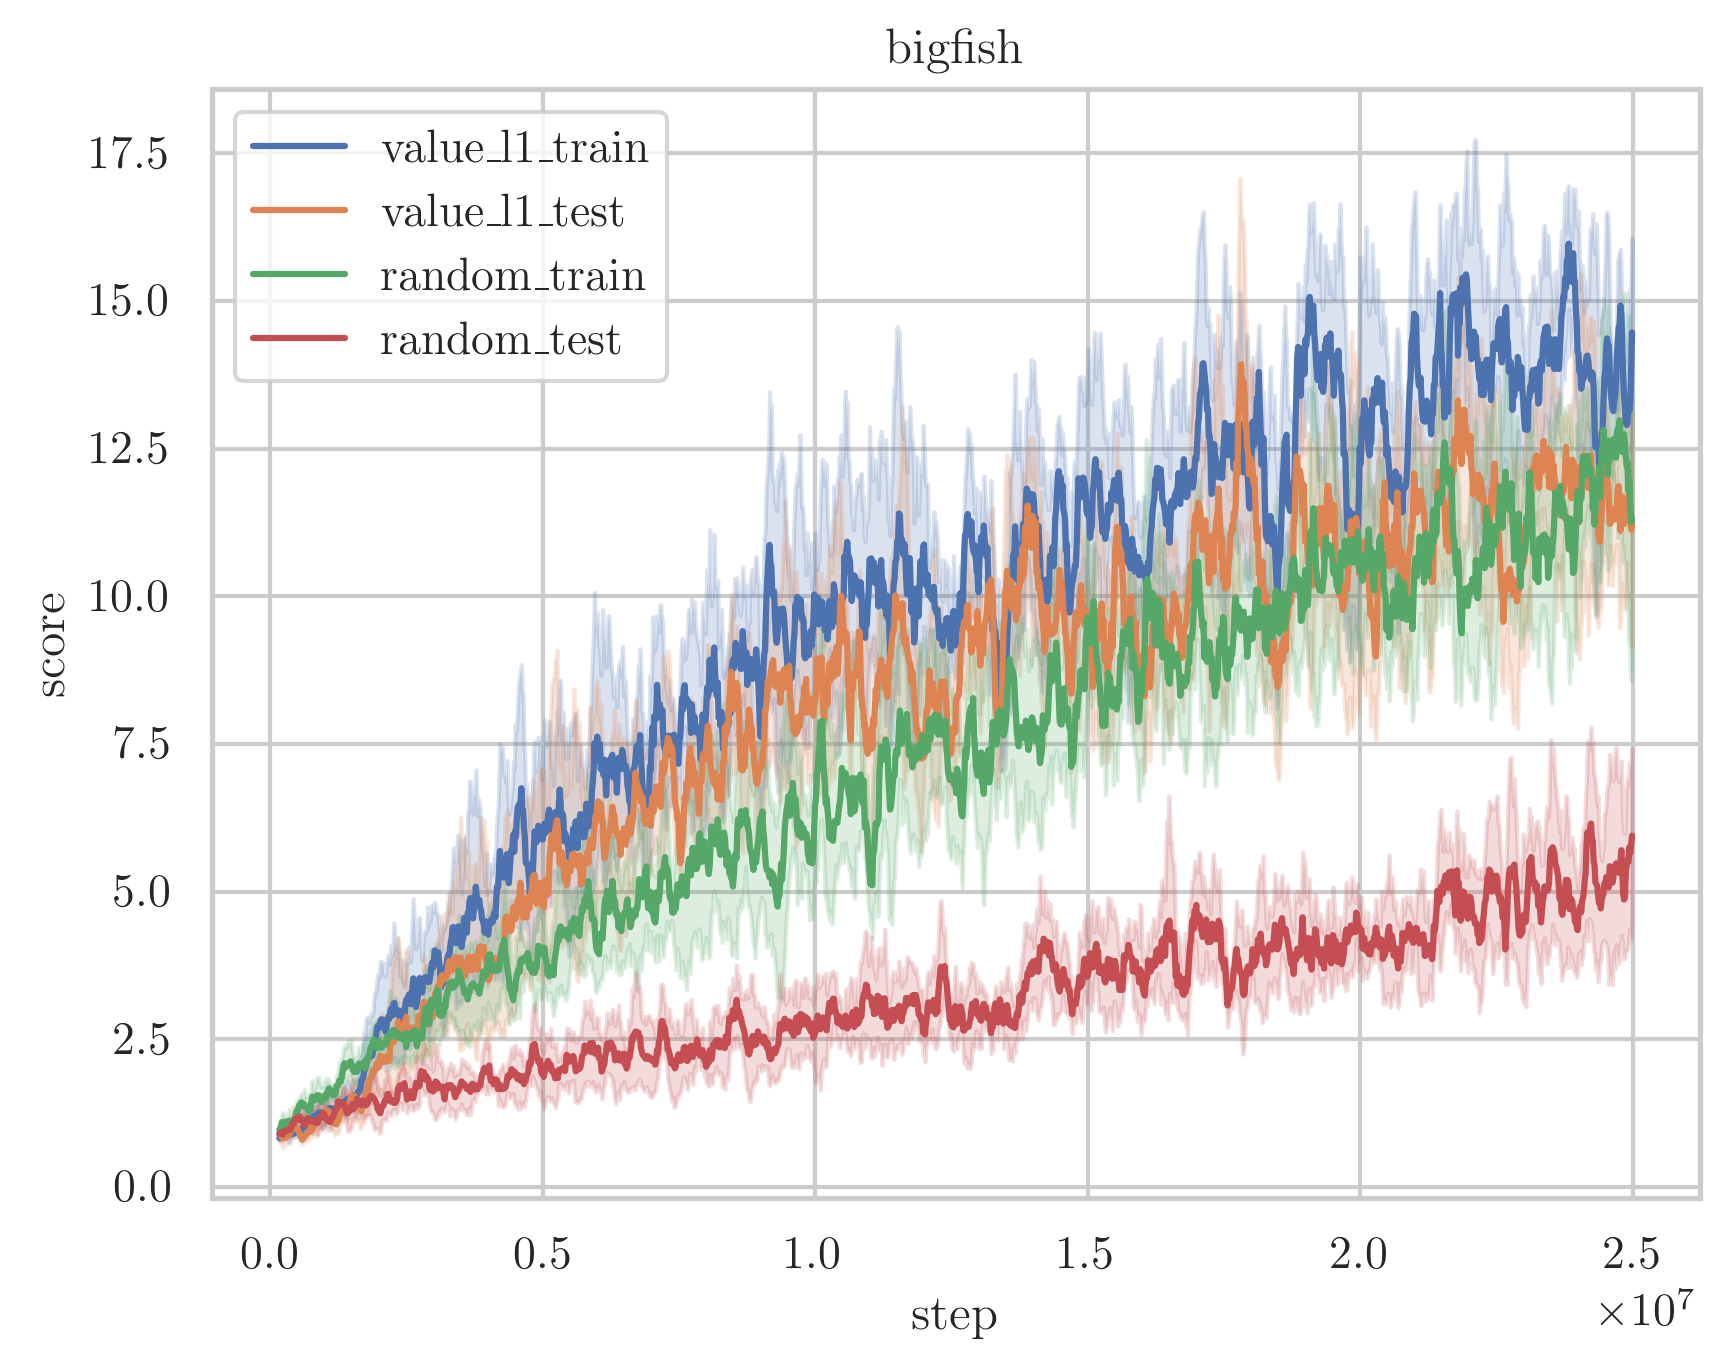

In [75]:
for env, rr in log_readers.items():
    for replay_strategy, run_readers in rr.items():
        # logs = pd.concat([run_reader.logs for run_reader in run_readers]).reset_index(drop=True)
        logs = run_readers[0].logs
        sns.lineplot(x='step', y='train_eval:mean_episode_return_mavg', data=logs, label=f'{replay_strategy}_train').set(title=env, xlabel='step', ylabel='score')
        sns.lineplot(x='step', y='test:mean_episode_return_mavg', data=logs, label=f'{replay_strategy}_test')

    plt.show()

# sns.lineplot(x='step', y='train_eval:mean_episode_return_mavg', data=logs, label='train set').set(title=env_name, xlabel='step', ylabel='score')
# sns.lineplot(x='step', y='test:mean_episode_return_mavg', data=logs, label='test set')
# sns.lineplot(x='step', y='train:mean_episode_return_mavg', data=logs, label='train dist')
# plt.show()

# Instance prediction with and without smoothing

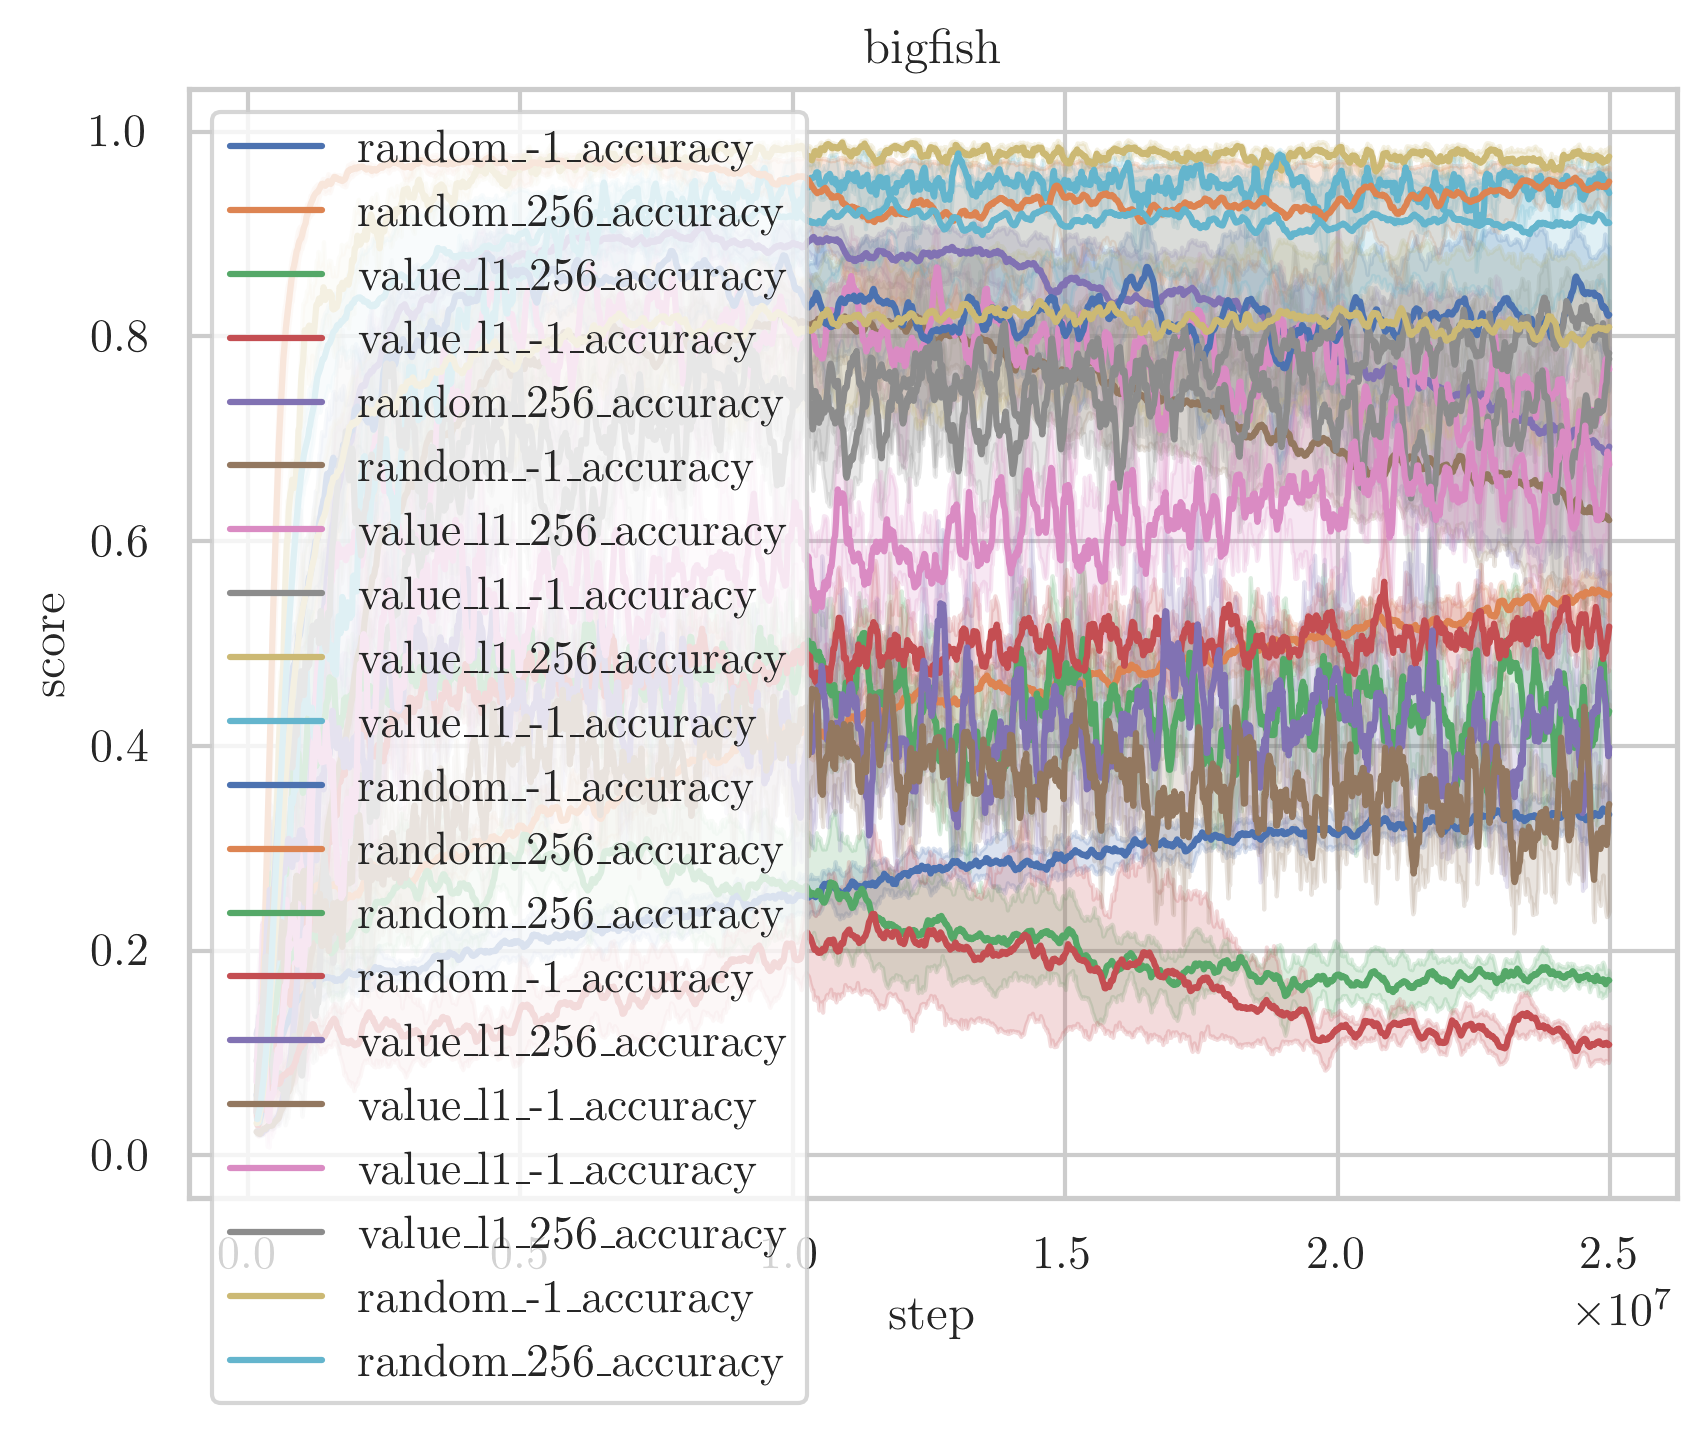

In [76]:
for env, rr in log_readers.items():
    for replay_strategy, run_readers in rr.items():
        for run_reader in run_readers:
            logs = run_reader.logs
            labl = f'{replay_strategy}_{run_reader.instance_predictor_hidden_size}'
            sns.lineplot(x='step', y='instance_pred_accuracy_mavg', data=logs, label=f'{labl}_accuracy').set(title=env, xlabel='step', ylabel='score')

plt.show()

In [ ]:
for env, rr in log_readers.items():
    for replay_strategy, run_readers in rr.items():
        for run_reader in run_readers:
            logs = run_reader.logs
            labl = f'{replay_strategy}_{run_reader.instance_predictor_hidden_size}'
            sns.lineplot(x='step', y='instance_pred_precision_mavg', data=logs, label=f'{labl}_precision').set(title=env, xlabel='step', ylabel='score')

plt.show()

## Entropy

In [ ]:
for env, rr in log_readers.items():
    for replay_strategy, run_readers in rr.items():
        for run_reader in run_readers:
            logs = run_reader.logs
            labl = f'{replay_strategy}_{run_reader.instance_predictor_hidden_size}'
            sns.lineplot(x='step', y='instance_pred_entropy_mavg', data=logs, label=f'{labl}_entropy').set(title=env, xlabel='step', ylabel='score')

plt.show()